## Examples occupations
- Radiologists
- Telemarketers
- Real Estate Sales Agents
- Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products
- Dishwasher (as an example of something not very automatable; replacing Barista)

In [8]:
import occupations
import importlib
importlib.reload(occupations)
occupations.search_title("radiologist")
occupations.search_title("telemarketers")

,onetsoc_code,title,description
0,41-9041.00,Telemarketers,Solicit donations or orders for goods or servi...


In [9]:
occupations.search_title("radiologist")


,onetsoc_code,title,description
0,29-1224.00,Radiologists,Diagnose and treat diseases and injuries using...


In [62]:
occupations.search_title("telemarketers")

,onetsoc_code,title,description
0,41-9041.00,Telemarketers,Solicit donations or orders for goods or servi...


In [7]:
occupations.search_title("real estate")

,onetsoc_code,title,description
0,11-9141.00,"Property, Real Estate, and Community Associati...","Plan, direct, or coordinate the selling, buyin..."
1,13-2023.00,Appraisers and Assessors of Real Estate,"Appraise real estate, exclusively, and estimat..."
2,41-9021.00,Real Estate Brokers,"Operate real estate office, or work for commer..."
3,41-9022.00,Real Estate Sales Agents,"Rent, buy, or sell property for clients. Perfo..."


In [1]:
! pip install --quiet git+https://github.com/expectedparrot/edsl.git


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
occupations.search_title("Barista")

,onetsoc_code,title,description
0,35-3023.01,Baristas,Prepare or serve specialty coffee or other bev...


In [68]:
nice_titles = ['Radiologists', 
               'Real Estate Sales Agents', 
               'Telemarketers', 
               'Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products', 
               'Baristas']

In [15]:
scenarios = occupations.get_scenarios(['Radiologists'])
from rich import print
print([s['task'][:100] for s in scenarios])

[
    "Obtain patients' histories from electronic records, patient interviews, dictated reports, or by comm",
    'Prepare comprehensive interpretive reports of findings.',
    'Perform or interpret the outcomes of diagnostic imaging procedures including magnetic resonance imag',
    'Review or transmit images and information using picture archiving or communications systems.',
    'Communicate examination results or diagnostic information to referring physicians, patients, or fami',
    'Provide counseling to radiologic patients to explain the processes, risks, benefits, or alternative ',
    'Instruct radiologic staff in desired techniques, positions, or projections.',
    'Confer with medical professionals regarding image-based diagnoses.',
    'Coordinate radiological services with other medical activities.',
    'Document the performance, interpretation, or outcomes of all procedures performed.',
    'Establish or enforce standards for protection of patients or personnel.',
    'Develop or monitor procedures to ensure adequate quality control of images.',
    'Recognize or treat complications during and after procedures, including blood pressure problems, pai',
    'Participate in continuing education activities to maintain and develop expertise.',
    'Participate in quality improvement activities including discussions of areas where risk of error is '
]

In [140]:
scenarios = occupations.get_scenarios(nice_titles)

from question_bank import task_survey
results = task_survey.by(scenarios).run(cache = cache, progress_bar = False)

In [161]:
help(task_survey.show_flow)

Help on method show_flow in module edsl.surveys.SurveyFlowVisualizationMixin:

show_flow() method of edsl.surveys.Survey.Survey instance
    Create an image showing the flow of users through the survey.



In [72]:
results.to_csv("five_occupations.csv")

In [141]:
results.sql("""
select \"scenario.occupation\" as Occupation, 
round(avg(\"answer.easy_to_tell\"), 2) as "Hard-to-tell Score", 
count(*) as "Number of tasks"
from self 
group by \"scenario.occupation\"
order by "Hard-to-tell Score" desc
""", shape = "wide")

,Occupation,Hard-to-tell Score,Number of tasks
0,Radiologists,8.33,15
1,Real Estate Sales Agents,5.70,23
2,"Sales Representatives, Wholesale and Manufactu...",5.29,21
3,Telemarketers,2.83,6
4,Baristas,1.58,19


In [137]:
def table(column_name, label):
    return results.sql(f"""
    select \"scenario.occupation\" as Occupation, 
    round(avg(\"{column_name}\"), 2) as "{label}", 
    count(*) as "Number of tasks"
    from self 
    group by \"scenario.occupation\"
    order by "Hard-to-tell Score" desc
    """, shape = "wide")

table("answer.gen_ai_help", "Gen AI Helps")

,Occupation,Gen AI Helps,Number of tasks
0,Telemarketers,6.33,6
1,"Sales Representatives, Wholesale and Manufactu...",6.38,21
2,Real Estate Sales Agents,4.61,23
3,Radiologists,5.13,15
4,Baristas,1.42,19


In [152]:
[q.question_name for q in task_survey.questions]

['info_good',
 'gen_ai_help',
 'trigger',
 'easy_to_tell',
 'manager_task',
 'ratio_describe_to_do']

In [156]:
print(task_survey.questions[4].question_text)
print(task_survey.questions[4].question_options)
results.sql("""
SELECT 
    \"scenario.occupation\", 
    \"answer.manager_task\", 
    COUNT(*) AS "Number of tasks",
    100 * COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY \"scenario.occupation\") AS "Fraction of tasks"
FROM self
GROUP BY \"scenario.occupation\", \"answer.manager_task\"
""", shape = "wide")



    Consider this occupation: {{ occupation }}.
    Part of this occupation is this task: {{ task }}.
    
    Imagine a manager who was in this occupation is now asking a worker with the same occupation to do the task. 
    How much specific instruction is this task likely to require? 
    
['None', 'Almost none', 'Some - less than an hour', 'Great deal - mulitple hours']


,scenario.occupation,answer.manager_task,Number of tasks,Fraction of tasks
0,Baristas,Almost none,13,68.421053
1,Baristas,Some - less than an hour,6,31.578947
2,Radiologists,Almost none,7,46.666667
3,Radiologists,Some - less than an hour,8,53.333333
4,Real Estate Sales Agents,Almost none,8,34.782609
5,Real Estate Sales Agents,Some - less than an hour,15,65.217391
6,"Sales Representatives, Wholesale and Manufactu...",Almost none,4,19.047619
7,"Sales Representatives, Wholesale and Manufactu...",Some - less than an hour,17,80.952381
8,Telemarketers,Almost none,1,16.666667
9,Telemarketers,Some - less than an hour,5,83.333333


In [160]:
results.sql("""
SELECT 
    \"scenario.occupation\", 
    \"answer.info_good\", 
    COUNT(*) AS "Number of tasks",
    100 * COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY \"scenario.occupation\") AS "Fraction of tasks"
FROM self
GROUP BY \"scenario.occupation\", \"answer.info_good\"
""", shape = "wide")

,scenario.occupation,answer.info_good,Number of tasks,Fraction of tasks
0,Baristas,No,14,73.684211
1,Baristas,Partially,4,21.052632
2,Baristas,Yes,1,5.263158
3,Radiologists,No,2,13.333333
4,Radiologists,Partially,8,53.333333
5,Radiologists,Yes,5,33.333333
6,Real Estate Sales Agents,No,6,26.086957
7,Real Estate Sales Agents,Partially,13,56.521739
8,Real Estate Sales Agents,Yes,4,17.391304
9,"Sales Representatives, Wholesale and Manufactu...",No,7,33.333333


In [157]:
results.sql("""
SELECT 
    \"scenario.occupation\", 
    \"answer.trigger\", 
    COUNT(*) AS "Number of tasks",
    100 * COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY \"scenario.occupation\") AS "Fraction of tasks"
FROM self
GROUP BY \"scenario.occupation\", \"answer.trigger\"
""", shape = "wide")

,scenario.occupation,answer.trigger,Number of tasks,Fraction of tasks
0,Baristas,Completion of a previous step in some producti...,2,10.526316
1,Baristas,External trigger like a customer request,11,57.894737
2,Baristas,Internal choice - can be scheduled whenever co...,6,31.578947
3,Radiologists,Completion of a previous step in some producti...,7,46.666667
4,Radiologists,External trigger a request from another part o...,3,20.000000
5,Radiologists,External trigger like a customer request,2,13.333333
6,Radiologists,Internal choice - can be scheduled whenever co...,3,20.000000
7,Real Estate Sales Agents,Completion of a previous step in some producti...,2,8.695652
8,Real Estate Sales Agents,External trigger like a customer request,16,69.565217
9,Real Estate Sales Agents,Internal choice - can be scheduled whenever co...,5,21.739130


In [146]:
results.sql("""
select 'scenario.occupation', \"answer.manager_task\", 
count(*) as "Number of tasks"
from self
group by \"scenario.occupation\", 
\"answer.manager_task\" 
""", shape = "wide")

,'scenario.occupation',answer.manager_task,Number of tasks
0,scenario.occupation,Almost none,13
1,scenario.occupation,Some - less than an hour,6
2,scenario.occupation,Almost none,7
3,scenario.occupation,Some - less than an hour,8
4,scenario.occupation,Almost none,8
5,scenario.occupation,Some - less than an hour,15
6,scenario.occupation,Almost none,4
7,scenario.occupation,Some - less than an hour,17
8,scenario.occupation,Almost none,1
9,scenario.occupation,Some - less than an hour,5


In [ ]:
table("answer.gen_ai_help", "Gen AI Helps")

In [2]:
from edsl.data import Cache
cache = Cache.from_jsonl('rubin_cache.jsonl')
len(cache)

420

In [8]:
get_scenarios(1)[1]

{
  "occupation": "Chief Sustainability Officers",
  "task": "Develop or execute strategies to address issues such as energy use, resource conservation, recycling, pollution reduction, waste elimination, transportation, education, and building design."
}

Scenario({'occupation': 'Chief Sustainability Officers', 'task': 'Develop or execute strategies to address issues such as energy use, resource conservation, recycling, pollution reduction, waste elimination, transportation, education, and building design.'})

In [19]:
import occupations
from occupations import get_scenarios, search_title
import importlib
importlib.reload(occupations)
scenarios = get_scenarios(slice(1,10,None))
search_title("dish")

,onetsoc_code,title,description
0,35-9021.00,Dishwashers,"Clean dishes, kitchen, food preparation equipm..."


In [22]:
from occupations import get_titles
titles = get_titles()
titles.index("Dishwashers")

570

In [6]:
from question_bank import task_survey
results = task_survey.by(scenarios).run(cache = cache, progress_bar = False)

In [7]:
cache.write_jsonl("rubin_cache.jsonl")

In [7]:
task_survey.show_questions()

Question: info_good

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type   ┃ Question Text                                            ┃ Options            ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ info_good     │ multiple_choice │ Consider this occupation {{ occupation }} and this task: │ Yes, Partially, No │
│               │                 │ {{ task }}.                                              │                    │
│               │                 │ Is this task output an information good (i.e.,           │                    │
│               │                 │ writing/text, audio, a decision, an image, a video)?     │                    │
│               │                 │                                                          │                    │
└───────────────┴─────────────────┴──────────────────────────────────────────────────────────┴────────────────────┘

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type   ┃ Question Text                                            ┃ Options            ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ info_good     │ multiple_choice │ Consider this occupation {{ occupation }} and this task: │ Yes, Partially, No │
│               │                 │ {{ task }}.                                              │                    │
│               │                 │ Is this task output an information good (i.e.,           │                    │
│               │                 │ writing/text, audio, a decision, an image, a video)?     │                    │
│               │                 │                                                          │                    │
└───────────────┴─────────────────┴──────────────────────────────────────────────────────────┴────────────────────┘

Question: gen_ai_help

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type ┃ Question Text                                ┃ Options                          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gen_ai_help   │ linear_scale  │ Consider this occupation: {{ occupation}}    │ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 │
│               │               │ and this task: {{ task }}.                   │                                  │
│               │               │ How helpful would generative AI to be        │                                  │
│               │               │ someone performing the task?                 │                                  │
│               │               │                                              │                                  │
└───────────────┴───────────────┴──────────────────────────────────────────────┴──────────────────────────────────┘

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type ┃ Question Text                                ┃ Options                          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gen_ai_help   │ linear_scale  │ Consider this occupation: {{ occupation}}    │ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 │
│               │               │ and this task: {{ task }}.                   │                                  │
│               │               │ How helpful would generative AI to be        │                                  │
│               │               │ someone performing the task?                 │                                  │
│               │               │                                              │                                  │
└───────────────┴───────────────┴──────────────────────────────────────────────┴──────────────────────────────────┘

Question: trigger

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type   ┃ Question Text                         ┃ Options                               ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ trigger       │ multiple_choice │ Consider the following task {{ task   │ Completion of a previous step in some │
│               │                 │ }} as part of the occupation {{       │ productive process, External trigger  │
│               │                 │ occupation }}.                        │ like a customer request, External     │
│               │                 │     What best describes when this     │ trigger a request from another part   │
│               │                 │ task is done?                         │ of the organization, Internal choice  │
│               │                 │                                       │ - can be scheduled whenever           │
│               │                 │                                       │ convenient                            │
└───────────────┴─────────────────┴───────────────────────────────────────┴───────────────────────────────────────┘

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type   ┃ Question Text                         ┃ Options                               ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ trigger       │ multiple_choice │ Consider the following task {{ task   │ Completion of a previous step in some │
│               │                 │ }} as part of the occupation {{       │ productive process, External trigger  │
│               │                 │ occupation }}.                        │ like a customer request, External     │
│               │                 │     What best describes when this     │ trigger a request from another part   │
│               │                 │ task is done?                         │ of the organization, Internal choice  │
│               │                 │                                       │ - can be scheduled whenever           │
│               │                 │                                       │ convenient                            │
└───────────────┴─────────────────┴───────────────────────────────────────┴───────────────────────────────────────┘

Question: easy_to_tell

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type ┃ Question Text                                ┃ Options                          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ easy_to_tell  │ linear_scale  │ Consider the occupation {{ occupation }}.    │ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 │
│               │               │ And consider the task done by someone in     │                                  │
│               │               │ this occupation: {{ task }}.                 │                                  │
│               │               │ Rate how easy it is for a non-expert to tell │                                  │
│               │               │ if the task is done correctly, on a scale of │                                  │
│               │               │ 1 to 10.                                     │                                  │
│               │               │                                              │                                  │
│               │               │ The task: {{ task }}.                        │                                  │
│               │               │ 1 = Very easy for a non-expert to tell if    │                                  │
│               │               │ done correctly.                              │                                  │
│               │               │ 10 = only an expert would know if done       │                                  │
│               │               │ correctly.                                   │                                  │
│               │               │                                              │                                  │
└───────────────┴───────────────┴──────────────────────────────────────────────┴──────────────────────────────────┘

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type ┃ Question Text                                ┃ Options                          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ easy_to_tell  │ linear_scale  │ Consider the occupation {{ occupation }}.    │ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 │
│               │               │ And consider the task done by someone in     │                                  │
│               │               │ this occupation: {{ task }}.                 │                                  │
│               │               │ Rate how easy it is for a non-expert to tell │                                  │
│               │               │ if the task is done correctly, on a scale of │                                  │
│               │               │ 1 to 10.                                     │                                  │
│               │               │                                              │                                  │
│               │               │ The task: {{ task }}.                        │                                  │
│               │               │ 1 = Very easy for a non-expert to tell if    │                                  │
│               │               │ done correctly.                              │                                  │
│               │               │ 10 = only an expert would know if done       │                                  │
│               │               │ correctly.                                   │                                  │
│               │               │                                              │                                  │
└───────────────┴───────────────┴──────────────────────────────────────────────┴──────────────────────────────────┘

Question: manager_task

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type   ┃ Question Text                         ┃ Options                               ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ manager_task  │ multiple_choice │                                       │ None, Almost none, Some - less than   │
│               │                 │     Consider this occupation: {{      │ an hour, Great deal - mulitple hours  │
│               │                 │ occupation }}.                        │                                       │
│               │                 │     Part of this occupation is this   │                                       │
│               │                 │ task: {{ task }}.                     │                                       │
│               │                 │                                       │                                       │
│               │                 │     Imagine a manager who was in this │                                       │
│               │                 │ occupation is now asking a worker     │                                       │
│               │                 │ with the same occupation to do the    │                                       │
│               │                 │ task.                                 │                                       │
│               │                 │     How much specific instruction is  │                                       │
│               │                 │ this task likely to require?          │                                       │
│               │                 │                                       │                                       │
└───────────────┴─────────────────┴───────────────────────────────────────┴───────────────────────────────────────┘

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Question Name ┃ Question Type   ┃ Question Text                         ┃ Options                               ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ manager_task  │ multiple_choice │                                       │ None, Almost none, Some - less than   │
│               │                 │     Consider this occupation: {{      │ an hour, Great deal - mulitple hours  │
│               │                 │ occupation }}.                        │                                       │
│               │                 │     Part of this occupation is this   │                                       │
│               │                 │ task: {{ task }}.                     │                                       │
│               │                 │                                       │                                       │
│               │                 │     Imagine a manager who was in this │                                       │
│               │                 │ occupation is now asking a worker     │                                       │
│               │                 │ with the same occupation to do the    │                                       │
│               │                 │ task.                                 │                                       │
│               │                 │     How much specific instruction is  │                                       │
│               │                 │ this task likely to require?          │                                       │
│               │                 │                                       │                                       │
└───────────────┴─────────────────┴───────────────────────────────────────┴───────────────────────────────────────┘

Question: ratio_describe_to_do

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Question Name        ┃ Question Type ┃ Question Text                                                  ┃ Options ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ratio_describe_to_do │ numerical     │                                                                │ None    │
│                      │               │     Consider this occupation: {{ occupation }}.                │         │
│                      │               │     Part of this occupation is this task: {{ task }}.          │         │
│                      │               │                                                                │         │
│                      │               │     Imagine a manager who was in this occupation is now asking │         │
│                      │               │ a worker with the same occupation to do the task.              │         │
│                      │               │     The worker is expert and does not need instruction in how  │         │
│                      │               │ to do the task generally.                                      │         │
│                      │               │     They only need to be instructed on any specifics.          │         │
│                      │               │                                                                │         │
│                      │               │     What is the ratio of time to describe this task to time to │         │
│                      │               │ do it on their own?                                            │         │
│                      │               │     E.g., if it takes just as long to describe the task as to  │         │
│                      │               │ do it on their own, then 1.                                    │         │
│                      │               │     If the task could be described in 5 minutes but the task   │         │
│                      │               │ takes 10 minutes, then 0.5.                                    │         │
│                      │               │                                                                │         │
└──────────────────────┴───────────────┴────────────────────────────────────────────────────────────────┴─────────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Question Name        ┃ Question Type ┃ Question Text                                                  ┃ Options ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ratio_describe_to_do │ numerical     │                                                                │ None    │
│                      │               │     Consider this occupation: {{ occupation }}.                │         │
│                      │               │     Part of this occupation is this task: {{ task }}.          │         │
│                      │               │                                                                │         │
│                      │               │     Imagine a manager who was in this occupation is now asking │         │
│                      │               │ a worker with the same occupation to do the task.              │         │
│                      │               │     The worker is expert and does not need instruction in how  │         │
│                      │               │ to do the task generally.                                      │         │
│                      │               │     They only need to be instructed on any specifics.          │         │
│                      │               │                                                                │         │
│                      │               │     What is the ratio of time to describe this task to time to │         │
│                      │               │ do it on their own?                                            │         │
│                      │               │     E.g., if it takes just as long to describe the task as to  │         │
│                      │               │ do it on their own, then 1.                                    │         │
│                      │               │     If the task could be described in 5 minutes but the task   │         │
│                      │               │ takes 10 minutes, then 0.5.                                    │         │
│                      │               │                                                                │         │
└──────────────────────┴───────────────┴────────────────────────────────────────────────────────────────┴─────────┘

In [27]:
scenarios = get_scenarios(570)
results = task_survey.by(scenarios).run(cache = cache, progress_bar = False)

In [28]:
scenarios[1:4]

{
  "occupation": "Dishwashers",
  "task": "Place clean dishes, utensils, or cooking equipment in storage areas."
}

{
  "occupation": "Dishwashers",
  "task": "Sort and remove trash, placing it in designated pickup areas."
}

{
  "occupation": "Dishwashers",
  "task": "Sweep or scrub floors."
}

[Scenario({'occupation': 'Dishwashers', 'task': 'Place clean dishes, utensils, or cooking equipment in storage areas.'}),
 Scenario({'occupation': 'Dishwashers', 'task': 'Sort and remove trash, placing it in designated pickup areas.'}),
 Scenario({'occupation': 'Dishwashers', 'task': 'Sweep or scrub floors.'})]

In [24]:
from dag import plot_dag

In [29]:
columns = ["occupation", "task"] +  task_survey.question_names
results.select(*columns).order_by("scenario.occupation").print()

{'scenario.occupation': ['Dishwashers', 'Dishwashers', 'Dishwashers', 'Dishwashers', 'Dishwashers', 'Dishwashers', 'Dishwashers', 'Dishwashers', 'Dishwashers']}
{'scenario.task': ['Clean garbage cans with water or steam.', 'Stock supplies, such as food or utensils, in serving stations, cupboards, refrigerators, or salad bars.', 'Sweep or scrub floors.', 'Place clean dishes, utensils, or cooking equipment in storage areas.', 'Receive and store supplies.', 'Maintain kitchen work areas, equipment, or utensils in clean and orderly condition.', 'Sort and remove trash, placing it in designated pickup areas.', 'Transfer supplies or equipment between storage and work areas, by hand or using hand trucks.', 'Wash dishes, glassware, flatware, pots, or pans, using dishwashers or by hand.']}
{'answer.info_good': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']}
{'answer.gen_ai_help': ['0', '0', '0', '0', '1', '0', '0', '0', '0']}
{'answer.trigger': ['Completion of a previous step in some prod

scenario.occupation,scenario.task,answer.info_good,answer.gen_ai_help,answer.trigger,answer.easy_to_tell,answer.manager_task,answer.ratio_describe_to_do
Dishwashers,Clean garbage cans with water or steam.,No,0,Completion of a previous step in some productive process,1,Almost none,0.1
Dishwashers,"Stock supplies, such as food or utensils, in serving stations, cupboards, refrigerators, or salad bars.",No,0,Internal choice - can be scheduled whenever convenient,1,Almost none,0.1
Dishwashers,Sweep or scrub floors.,No,0,Completion of a previous step in some productive process,1,Almost none,0.1
Dishwashers,"Place clean dishes, utensils, or cooking equipment in storage areas.",No,0,Completion of a previous step in some productive process,1,Almost none,0.1
Dishwashers,Receive and store supplies.,No,1,Completion of a previous step in some productive process,2,Almost none,0.1
Dishwashers,"Maintain kitchen work areas, equipment, or utensils in clean and orderly condition.",No,0,Completion of a previous step in some productive process,1,Almost none,0.1
Dishwashers,"Sort and remove trash, placing it in designated pickup areas.",No,0,Completion of a previous step in some productive process,1,Almost none,0.1
Dishwashers,"Transfer supplies or equipment between storage and work areas, by hand or using hand trucks.",No,0,Completion of a previous step in some productive process,1,Almost none,0.1
Dishwashers,"Wash dishes, glassware, flatware, pots, or pans, using dishwashers or by hand.",No,0,External trigger a request from another part of the organization,1,Almost none,0.1


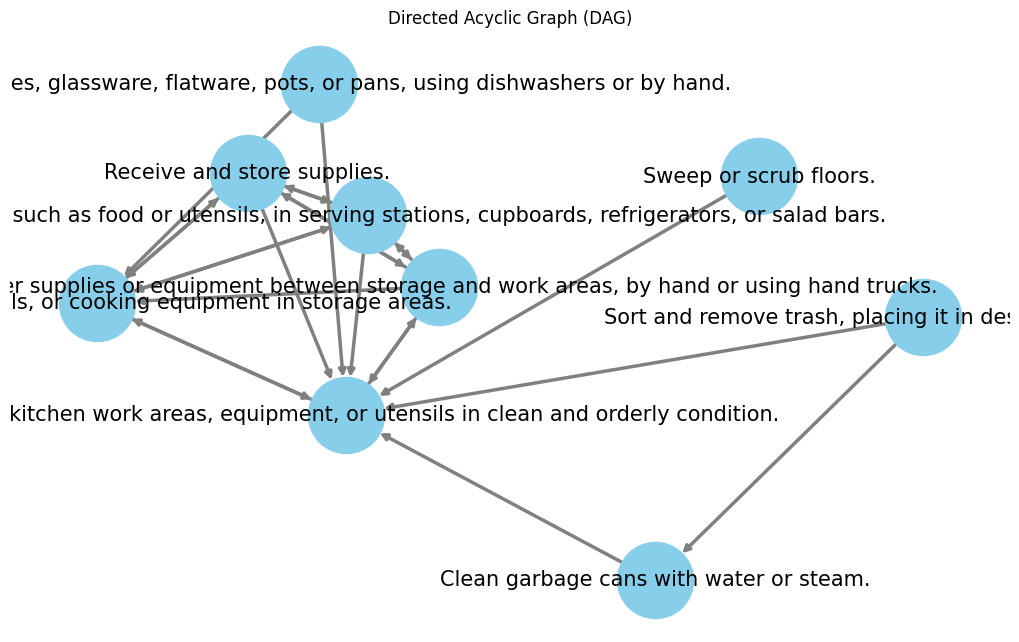

In [31]:
from dag import draw_dag, plot_dag

plot_dag(draw_dag(570))

In [19]:
results.to_csv("rubin_results.csv")

In [134]:
from edsl.questions import QuestionBudget

q1 = QuestionBudget(
    question_text = """Please help me allocated my monthly budget.""", 
    question_options = ["Food", "Data", "Rent", "Candles", "Utility"],
    question_name = "budget_1",
    budget_sum = sum([200, 150, 800, 3600, 150])
)
q2 = QuestionBudget(
    question_text = """Please help me allocated my monthly budget.""", 
    question_options = ["Food", "Data", "Rent", "Candles", "Utility"],
    question_name = "budget_2",
    budget_sum = sum([200, 150, 800, 3600, 150]) + 1000
)
q1.add_question(q2).run().select("answer.*").print(format = "rich")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ answer                    ┃ answer                     ┃ answer                    ┃ answer                     ┃
┃ .budget_2                 ┃ .budget_1_comment          ┃ .budget_1                 ┃ .budget_2_comment          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ [{'Food': 1500}, {'Data': │ The majority of the budget │ [{'Food': 1500}, {'Data': │ I allocated a significant  │
│ 100}, {'Rent': 2500},     │ is allocated to rent and   │ 100}, {'Rent': 2000},     │ portion to rent as it's    │
│ {'Candles': 50},          │ food which are essential.  │ {'Candles': 50},          │ typically the largest      │
│ {'Utility': 1750}]        │ Data and candles have      │ {'Utility': 1250}]        │ expense, followed by food, │
│                           │ smaller allocations, and   │                           │ utilities, data, and a     │
│                           │ utilities are given a      │                           │ small amount for candles.  │
│                           │ significant portion as     │                           │                            │
│                           │ they are necessary for     │                           │                            │
│                           │ comfortable living.        │                           │                            │
└───────────────────────────┴────────────────────────────┴───────────────────────────┴────────────────────────────┘